In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy.stats import ttest_ind

df = pd.read_csv( "health_study_dataset.csv")

In [2]:

mean_median_min_max = df[["age", "weight", "height", "systolic_bp", "cholesterol"]].agg(["count","mean", "std", "median", "max", "min"])
mean_median_min_max

,age,weight,height,systolic_bp,cholesterol
count,800.000000,800.000000,800.000000,800.000000,800.000000
mean,49.426250,73.413000,171.849250,149.178625,4.929150
std,14.501118,13.685059,9.804259,12.793360,0.848413
median,50.000000,73.200000,171.350000,149.400000,4.970000
max,90.000000,114.400000,200.400000,185.900000,7.880000
min,18.000000,33.700000,144.400000,106.800000,2.500000


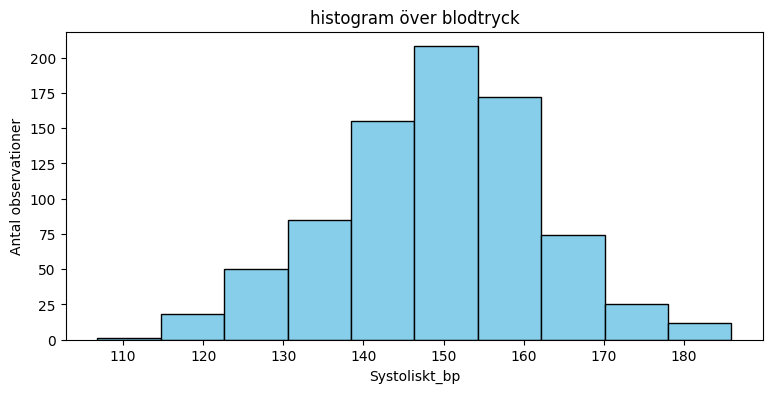

In [3]:
#histogram över blodtryck 
import matplotlib.pyplot as plt

def hist (ax, data,column, title, xlabel, ylabel):
    ax.hist(data[column], bins=10, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax  
fig , ax = plt.subplots(figsize = (9,4))
hist(ax, df, "systolic_bp",  "histogram över blodtryck", "Systoliskt_bp", "Antal observationer")
plt.show()

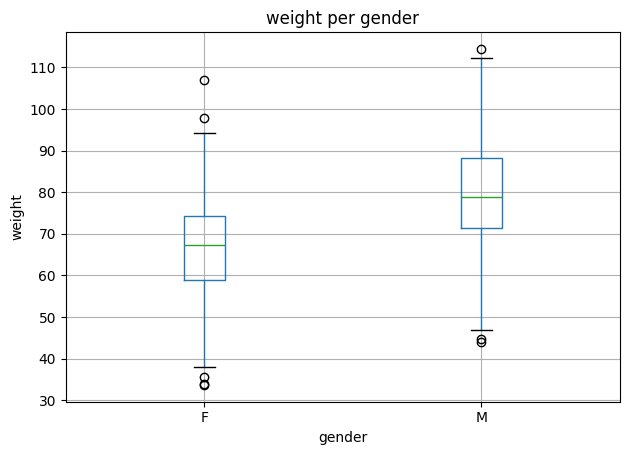

In [4]:
#boxplot över vikt per kön

fig, ax = plt.subplots()
df.boxplot(column = "weight" , by ="sex", ax=ax)
ax.set_title("weight per gender")
ax.set_xlabel("gender")
ax.set_ylabel("weight")
plt.suptitle('')

plt.tight_layout()





plt.show()

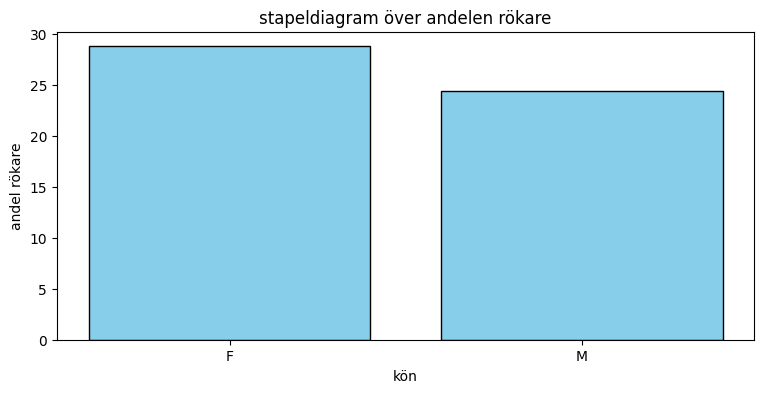

sex
F    28.784119
M    24.433249
Name: smoker, dtype: float64

In [5]:
#stapeldiagram över andelen rökare

df["smoker"] = df ["smoker"].map({"Yes": 1,"No": 0})

smoker_per_gender  = df.groupby ("sex")["smoker"].mean()* 100


def bar(ax, categories, values, title, xlabel, ylabel):
    ax.bar(categories, values, color='skyblue', edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax  


fig , ax = plt.subplots(figsize = (9,4))

bar(
    ax,
    categories= smoker_per_gender.index, 
    values= smoker_per_gender.values, 
    title="stapeldiagram över andelen rökare", 
    xlabel= "kön", 
    ylabel ="andel rökare"
    )

plt.show()

smoker_per_gender

In [6]:
#Beräkna andelen personer i datasetet som har sjukdomen
#Använd numpy för att simulera 1000 slumpade personer med samma sannolikhet för sjukdom
#Jämför den simulerade andelen med den verkliga andelen i datasetet

sjukdom = df["disease"].mean()*100

antal_personer = 1000
sjuka_människor = 0.29

# Simulera sjukdom
disease = np.random.binomial(n=1, p=sjuka_människor, size=antal_personer)

df = pd.DataFrame({"disease": disease})

andel_sjuka = df["disease"].mean() * 100

print (f"{sjukdom:.1f}% verkliga andelen personer har sjukdom.")
print(f"{andel_sjuka:.1f}%  simulerade andelen personer har sjukdom")

5.9% verkliga andelen personer har sjukdom.
27.4%  simulerade andelen personer har sjukdom


In [7]:
# Load data
df = pd.read_csv("health_study_dataset.csv")

# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Check columns
print(df.columns.tolist())


['id', 'age', 'sex', 'height', 'weight', 'systolic_bp', 'cholesterol', 'smoker', 'disease']


In [8]:
#Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation)

bp = df["systolic_bp"].dropna()
true_mean = float(np.mean(bp))
true_mean

149.178625

In [9]:
#Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation)
bp = df["systolic_bp"].dropna()
true_mean = float(np.mean(bp))
n= len(bp)
x= np.random.choice(bp, size =n )
mean_x = float (np.mean(x))
s = float(np.std(x, ddof=1))
se= s / np.sqrt(n)
mean_x , s , n , se


(149.5875, 13.196925486751775, 800, np.float64(0.466581775124788))

In [10]:
#Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation)

def ci_mean_normal(x, confidence= 0.95):
  
    mean_x = float(np.mean(x))
    n = len(x)

    z_critical = 1.96   # värde från normalfördelningen (1.96 för 95% konfidensnivå)
    half_width = z_critical * s / sqrt(n)
    lo, hi = mean_x - half_width , mean_x + half_width
    return lo, hi, mean_x, s , n

lo, hi, mean_x, s , n = ci_mean_normal(x)
(lo, hi), mean_x, s, n, true_mean

((148.67299972075543, 150.50200027924458),
 149.5875,
 13.196925486751775,
 800,
 149.178625)

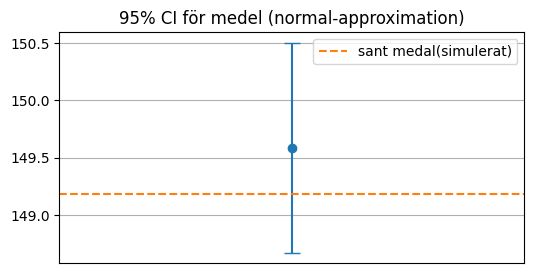

In [11]:
#Beräkna ett konfidensintervall för medelvärdet av systolic_bp (t.ex. med normalapproximation)
fig, ax = plt.subplots(figsize=(6,3))
ax.errorbar ([0],[mean_x], yerr=[[mean_x - lo],[hi - mean_x]], fmt = "o", capsize = 6)
ax.axhline(y=true_mean, color= "tab:orange", linestyle = "--", label = "sant medal(simulerat)")
ax.set_xticks([])
ax.grid(True, axis="y")
ax.legend()
ax.set_title("95% CI för medel (normal-approximation)")

plt.show()

In [12]:
#Testa hypotesen: ”Rökare har högre medel-blodtryck än icke-rökare
# t-test-funktion
from scipy.stats import ttest_ind

df = pd.read_csv("health_study_dataset.csv")

df["smoker"] = df["smoker"].map({"Yes": 1, "No": 0})


smokers = df[df["smoker"] == 1]["systolic_bp"]
nonsmokers = df[df["smoker"] == 0]["systolic_bp"]


t_stat, p_val = ttest_ind(smokers, nonsmokers, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)
print("Mean blodtryck (smokers):", smokers.mean())
print("Mean blodtryck (non-smokers):", nonsmokers.mean())




t-statistic: 0.4503433193393224
p-value: 0.6527338743398998
Mean blodtryck (smokers): 149.524882629108
Mean blodtryck (non-smokers): 149.05298126064736


Testa hypotesen av rökare har högre medel-blodtryck än icke-rökare.
t-statistic 0.45 tyder skillnaden mellan rökare och icke rökare är mycket liten jämfört med variationen.
Skillnaden mellan medel-blodtryck av rökare och icke-rökare är ca 0.47, väldigt liten.
